# Model

In [48]:
%run Package.ipynb

In [2]:
path = 'Data'

In [3]:
train = pd.read_pickle(path + '/d_train_sme.pkl')
valid = pd.read_pickle(path + '/d_valid_sme.pkl')
oot = valid

In [4]:
print(sum(train['BAD']) / train.shape[0])
print(sum(valid['BAD']) / valid.shape[0])

0.041600326597264745
0.0415435921867556


In [45]:
train

BAD CUSTOMER_ID BUSINESS_DATE  YEARMONTH  FLAG_OBS_FROM_LOANS_TBL  \
0      0.0     6129978    2021-07-31   202107.0                      1.0   
1      0.0     6130040    2021-05-31   202105.0                      1.0   
2      0.0     6130040    2021-06-30   202106.0                      1.0   
3      0.0     6130040    2021-07-31   202107.0                      1.0   
4      0.0     6130423    2021-05-31   202105.0                      1.0   
...    ...         ...           ...        ...                      ...   
24490  0.0       98591    2021-06-30   202106.0                      1.0   
24491  0.0      986465    2021-05-31   202105.0                      0.0   
24492  0.0      986465    2021-06-30   202106.0                      0.0   
24493  0.0      986465    2021-07-31   202107.0                      0.0   
24494  0.0      986823    2021-05-31   202105.0                      1.0   

       FLAG_OBS_FROM_CARD_TBL  FLAG_OBS_FROM_LC_TBL  FLAG_OBS_FROM_MD_TBL  \
0                         0.0                   0.0                   0.0   
1                         0.0                   0.0                   0.0   
2                         0.0                   0.0                   0.0   
3                         0.0                   0.0                   0.0   
4                         0.0                   0.0                   0.0   
...                       ...                   ...                   ...   
24490                     0.0                   0.0                   0.0   
24491                     0.0                   0.0                   1.0   
24492                     0.0                   0.0                   1.0   
24493                     0.0                   0.0                   1.0   
24494                     1.0                   1.0                   0.0   

       FLAG_OBS_FROM_OD_TBL  FLAG_DN  FLAG_SME  DEFAULT_CURR  DEFAULT_12M  \
0                       0.0      1.0       1.0           0.0          0.0   
1                       0.0      1.0       1.0           0.0          0.0   
2                       0.0      1.0       1.0           0.0          0.0   
3                       0.0      1.0       1.0           0.0          0.0   
4                       0.0      1.0       1.0           0.0          0.0   
...                     ...      ...       ...           ...          ...   
24490                   0.0      1.0       1.0           0.0          0.0   
24491                   1.0      1.0       1.0           0.0          0.0   
24492                   1.0      1.0       1.0           0.0          0.0   
24493                   1.0      1.0       1.0           0.0          0.0   
24494                   0.0      1.0       1.0           0.0          0.0   

       DEFAULT_NO_COVID_CURR  DEFAULT_NO_COVID_12M  FLAG_COVID_CURR  \
0                        0.0                   0.0              0.0   
1                        0.0                   0.0              0.0   
2                        0.0                   0.0              0.0   
3                        0.0                   0.0              0.0   
4                        0.0                   0.0              0.0   
...                      ...                   ...              ...   
24490                    0.0                   0.0              0.0   
24491                    0.0                   0.0              0.0   
24492                    0.0                   0.0              0.0   
24493                    0.0                   0.0              0.0   
24494                    0.0                   0.0              0.0   

       FLAG_COVID_1Y  CURR_QUICKWIN  HHB1  FL_ONLY_OD_NOTUSED   NAMBC  \
0                0.0            0.0   0.0                 0.0  2018.0   
1                0.0            0.0   0.0                 0.0  2019.0   
2                0.0            0.0   0.0                 0.0  2020.0   
3                0.0            0.0   0.0                 0.0  2020.0   
4                0.0      

In [5]:
train.shape, valid.shape

((24495, 875), (10495, 875))

In [6]:
short_list = ['AGE_CORP_YEAR', 'CLOS_CNT_APP_APPROVE_12M', 'CLOS_CNT_APP_APPROVE_6M', 'CLOS_CNT_APP_APPROVE_3M', 'CLOS_CNT_APP_APPROVE_1M', 'CLOS_RT_APP_APPROVED_12M', 'CLOS_FREQ_CHANGE_ID', 'CLOS_FREQ_CHANGE_ID_2', 'CLOS_LABOUR_NO', 'CLOS_MNG_REP_AGE', 
'CLOS_MNG_REP_LEGAL_AGE', 'CLOS_MNG_CNT_HOLDER', 'CLOS_KEY_PERSON_AGE', 'CLOS_KEY_PERSON_YEARS_COMP', 'CLOS_KEY_PERSON_EXP_YEARS', 'CLOS_MANAGER_AGE', 'CLOS_MANAGER_YEARS_COMP', 'CLOS_MANAGER_EXP_YEARS', 'CLOS_MAIN_SH_YEARS_COMP', 'CLOS_MAIN_SH_EXP_YEARS', 
'CLOS_COLL_CNT', 'CIC_1M', 'CIC_2M', 'CIC_3M', 'CIC_6M', 'CIC_12M', 'EWS_MAX_COUNT_L3M', 'EWS_MAX_COUNT_L6M', 'EWS_MAX_COUNT_L9M', 'EWS_MAX_COUNT_L12M', 
 'MAXDPD_1Y_BFROBS', 'MAXDPD_6M_BFROBS', 'MAXDPD_3M_BFROBS', 'MAXDPD_1M_BFROBS', 'N1_COUNT_1Y', 'N1_COUNT_3M', 'N1_COUNT_6M', 'N3_COUNT_1Y', 'N3_COUNT_3M', 
'N3_COUNT_6M', 'N7_COUNT_1Y', 'N7_COUNT_3M', 'N7_COUNT_6M', 'N10_COUNT_1Y', 'N10_COUNT_3M', 'N10_COUNT_6M', 'N30_COUNT_1Y', 'N30_COUNT_3M', 'N30_COUNT_6M', 
'TOTAL_DAYS_OVD_1Y', 'TOTAL_DAYS_OVD_6M', 'TOTAL_DAYS_OVD_3M', 'TOTAL_DAYS_OVD_1M', 'AVG_DAYS_OVD_1Y', 'AVG_DAYS_OVD_3M', 'AVG_DAYS_OVD_6M', 'GROW_MAXDPD_1M', 'GROW_MAXDPD_3M', 'GROW_MAXDPD_3M2', 
'GROW_MAXDPD_6M', 'GROW_OVDDAY_3M', 'GROW_OVDDAY_3M2', 'GROW_OVDDAY_6M', 'DAYS_FROM_LAST_DELIQ', 'DAYS_FROM_LAST_3D_DELIQ', 'DAYS_FROM_LAST_7D_DELIQ', 'DAYS_FROM_LAST_10D_DELIQ', 'DAYS_FROM_LAST_15D_DELIQ', 'DAYS_FROM_LAST_30D_DELIQ', 
'MAXDPD_12M_BFROBS_CC_V2', 'MAXDPD_6M_BFROBS_CC_V2', 'MAXDPD_3M_BFROBS_CC_V2', 'MAXDPD_1M_BFROBS_CC_V2', 'N1_COUNT_12M_CC', 'N1_COUNT_3M_CC', 'N1_COUNT_6M_CC', 'N3_COUNT_12M_CC', 'N3_COUNT_3M_CC', 'N3_COUNT_6M_CC', 
'N7_COUNT_12M_CC', 'N7_COUNT_3M_CC', 'N7_COUNT_6M_CC', 'N10_COUNT_12M_CC', 'N10_COUNT_3M_CC', 'N10_COUNT_6M_CC', 'N30_COUNT_12M_CC', 'N30_COUNT_3M_CC', 'N30_COUNT_6M_CC', 'TOTAL_DAYS_OVD_12M_CC', 
'TOTAL_DAYS_OVD_6M_CC', 'TOTAL_DAYS_OVD_3M_CC', 'TOTAL_DAYS_OVD_1M_CC', 'DAYS_FROM_LAST_DELIQ_CC', 'DAYS_FROM_LAST_7D_DELIQ_CC', 'DAYS_FROM_LAST_10D_DELIQ_CC', 'DAYS_FROM_LAST_15D_DELIQ_CC', 'DAYS_FROM_LAST_30D_DELIQ_CC', 'MAXDPD_1Y_BFROBS_OD', 'MAXDPD_6M_BFROBS_OD', 
'TOTAL_OVD_DAY_1Y_OD', 'TOTAL_OVD_DAY_6M_OD', 'MAX_PCT_USED_1Y_OD', 'MAX_PCT_USED_6M_OD', 'MAX_PCT_USED_3M_OD', 'AVG_PCT_USED_1Y_OD', 'AVG_PCT_USED_6M_OD', 'AVG_PCT_USED_3M_OD', 'N1_COUNT_1Y_ALL', 'N1_COUNT_3M_ALL', 
'N1_COUNT_6M_ALL', 'N3_COUNT_1Y_ALL', 'N3_COUNT_3M_ALL', 'N3_COUNT_6M_ALL', 'N7_COUNT_1Y_ALL', 'N7_COUNT_3M_ALL', 'N7_COUNT_6M_ALL', 'N10_COUNT_1Y_ALL', 'N10_COUNT_3M_ALL', 'N10_COUNT_6M_ALL', 
'N30_COUNT_1Y_ALL', 'N30_COUNT_3M_ALL', 'N30_COUNT_6M_ALL', 'TOTAL_DAYS_OVD_1Y_ALL', 'TOTAL_DAYS_OVD_6M_ALL', 'TOTAL_DAYS_OVD_3M_ALL', 'TOTAL_DAYS_OVD_1M_ALL', 'DFR_LST_DELIQ_ALL', 'DFR_LST_3D_DELIQ_ALL', 'DFR_LST_7D_DELIQ_ALL', 
'DFR_LST_10D_DELIQ_ALL', 'DFR_LST_15D_DELIQ_ALL', 'DFR_LST_30D_DELIQ_ALL', 'MAXDPD_ALL_12M', 'MAXDPD_ALL_6M', 'MAXDPD_ALL_3M', 'MAXDPD_ALL_1M', 'COUNT_COLL_CURR', 'FLAG_DEPOSIT_COLL_CURR', 'COLL_LTV4', 
'COLL_LTV5', 'COLL_LTV6', 'AVG_BAL_CURRACC_3M', 'AVG_BAL_CURRACC_6M', 'AVG_BAL_CURRACC_1Y', 'CASHOUT_AMT_6M', 'CASHOUT_AMT_3M', 'CASHOUT_AMT_1Y', 'CASHIN_AMT_6M', 'CASHIN_AMT_3M', 
'BALCURACC1Y_NEXTOBL_PCT', 'BALCURACC3M_NEXTOBL_PCT', 'BALCURACC6M_NEXTOBL_PCT', 'BALCURACC1Y_OUSTAMT_PCT', 'BALCURACC3M_OUSTAMT_PCT', 'BALCURACC6M_OUSTAMT_PCT', 'CASHOUT3M_NEXTOBL_PCT', 'CASHOUT6M_NEXTOBL_PCT', 'TRIAL_CALL_1M', 'TRIAL_CALL_3M', 
'TRIAL_CALL_6M', 'TRIAL_CALL_1Y', 'NOTCONTACT_CALL_1M', 'NOTCONTACT_CALL_3M', 'NOTCONTACT_CALL_6M', 'NOTCONTACT_CALL_1Y', 'INTERRUPT_CALL_1M', 'INTERRUPT_CALL_3M', 'INTERRUPT_CALL_6M', 'INTERRUPT_CALL_1Y', 
'MAX_WAITTIME_1M', 'MAX_WAITTIME_3M', 'MAX_WAITTIME_6M', 'MAX_WAITTIME_1Y', 'AVG_WAITTIME_1M', 'AVG_WAITTIME_3M', 'AVG_WAITTIME_6M', 'AVG_WAITTIME_1Y', 'TRIAL_CALL_MANUAL_1M', 'TRIAL_CALL_MANUAL_3M', 
'TRIAL_CALL_MANUAL_6M', 'TRIAL_CALL_MANUAL_1Y', 'TRIAL_CALL_AUTO_1M', 'TRIAL_CALL_AUTO_3M', 'TRIAL_CALL_AUTO_6M', 'TRIAL_CALL_AUTO_1Y', 'PCT_CONTACT_CALL_1M', 'PCT_CONTACT_CALL_3M', 'PCT_CONTACT_CALL_6M', 'PCT_CONTACT_CALL_1Y', 
'TRIAL_ACTION_1M', 'TRIAL_ACTION_3M', 'TRIAL_ACTION_6M', 'TRIAL_ACTION_1Y', 'CNT_REFUSE_1M', 'CNT_REFUSE_3M', 'CNT_REFUSE_6M', 'CNT_REFUSE_1Y', 'Leverage3', 'Leverage16', 
'Leverage17', 'DSCR1', 'DSCR2', 'DSCR3', 'DSCR4', 'DSCR5', 'DSCR6', 'DSCR7', 'DSCR8', 'DSCR9', 
'DSCR10', 'DSCR11', 'DSCR12', 'DSCR13', 'DSCR14', 'DSCR15', 'DSCR16', 'DSCR17', 'DSCR18', 'DSCR19', 
'DSCR20', 'DSCR21', 'Efficiency1', 'Efficiency2', 'Efficiency3', 'Efficiency4', 'Efficiency5', 'Efficiency6', 'Profitability1', 'Profitability2', 
'Profitability3', 'Profitability4', 'Profitability5', 'Return1', 'Return2', 'Return3', 'Return4', 'Return5', 'Return6', 'Return7', 
'Return8', 'Return9', 'Return10', 'Return11', 'Return12', 'Return13', 'Return14', 'Return15', 'Return16', 'Activity1', 
'Activity2', 'Size1', 'Size2', 'Size3', 'Size4', 'Size5', 'FS_EBIT_OUST_AMT_CURR']

In [7]:
short_list = [x.upper() for x in short_list]

In [8]:
x_train = train[short_list]
y_train = train['BAD']
x_valid = valid[short_list]
y_valid = valid['BAD']
x_oot = valid[short_list]
y_oot = valid['BAD']
x_train.shape, x_valid.shape, x_oot.shape

((24495, 256), (10495, 256), (10495, 256))

## Option 1 
max_dept = 2
n_boost_round = 200,
early_stopping = 20

In [13]:
import optuna
from optuna.samplers import TPESampler
from itertools import chain

def objective(trial):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boost_from_average': True,
        'verbose': -1,
        'boosting_type': 'gbdt', 
        'max_bin': trial.suggest_int('max_bin', 2, 20),
        'max_depth': trial.suggest_int('max_depth', 2, 2),
        'learning_rate': trial.suggest_discrete_uniform('learning_rate', 0.001, 0.2, 0.0001),
        'num_leaves': trial.suggest_int('num_leaves', 5, 20),
        'min_sum_hessian_in_leaf': trial.suggest_loguniform('min_sum_hessian_in_leaf', 0.02, 0.1),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1),
        'seed':0
    }
    hist_eval=dict()
    d_train = lgb.Dataset(x_train, train['BAD'])
    d_valid = lgb.Dataset(x_valid, valid['BAD'])
    
    model = lgb.train(params, d_train, num_boost_round=200, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=20, 
                      verbose_eval=0, 
                      evals_result=hist_eval)
    return 2*hist_eval['valid_1']['auc'][-1]-1

In [14]:
%%time

optuna.logging.enable_propagation()  # Propagate logs to the root logger.
optuna.logging.disable_default_handler()  # Stop showing logs in sys.stderr.
optuna.logging.set_verbosity(optuna.logging.WARNING)

n_loops = 10

result = pd.DataFrame({'Params':'',
                       'Train':float(),
                       'Valid': float(),
                       'OOT': float(),
                       'Feature_final':'',
                       'Random_state':int()}, index=[]) 

for i in range(n_loops):
    print(i)
    random_state = np.array(np.random.rand(1)*1000).astype(int)[0]
    study = optuna.create_study(direction='maximize',sampler=TPESampler(seed =random_state))
    study.optimize(objective, n_trials=100)


    best = study.best_trial
    x = {'objective': 'binary',
         'metric': 'auc',
         'boost_from_average': True,
         'verbose': -1,
         'boosting_type': 'gbdt',
         'seed':0}
    y= best.params
    params = dict(chain(x.items(), y.items()))

    df_select_step, feature_final = varselect_greedy(x_train.columns.tolist(), params, slentry=0.005, num_boost_round=200)

    hist_eval=dict()
    d_train = lgb.Dataset(x_train[feature_final], train['BAD'])
    d_valid = lgb.Dataset(x_valid[feature_final], valid['BAD'])

    model = lgb.train(params, d_train, num_boost_round=200, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=50, 
                      verbose_eval=0, 
                      evals_result=hist_eval)

    value = pd.concat([pd.DataFrame({'Params' : str(params),
                                     'Train':2*roc_auc_score(train['BAD'], model.predict(train[feature_final], num_iteration=model.best_iteration))-1,
                                     'Valid':2*roc_auc_score(valid['BAD'], model.predict(valid[feature_final], num_iteration=model.best_iteration))-1,
                                     'OOT':2*roc_auc_score(oot['BAD'], model.predict(oot[feature_final], num_iteration=model.best_iteration))-1,
                                     'Feature_final':str(feature_final),
                                     'Random_state':random_state
                                    }, index=[0])
                      ], axis=1) 
    result=result.append(value)
    result.to_excel('optuna_new.xlsx', index=False)

0


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.37%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.01%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 79.10%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.70%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.72%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 82.63%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 83.46%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 84.05%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

1


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.54%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.87%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.21%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 80.25%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 81.39%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.53%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 83.25%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 84.06%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

2


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.75%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 80.32%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 81.97%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 83.13%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 83.79%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.58%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

3


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.54%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.53%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 79.06%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.51%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.71%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.57%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.34%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.90%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

4


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.36%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.60%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.22%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 80.71%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  N7_COUNT_6M                      with Gini 81.69%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 82.41%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 83.06%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.57%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

5


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.22%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.13%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.71%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 81.68%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 82.77%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 83.47%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

6


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.49%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 77.04%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 79.13%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.73%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 81.71%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.69%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 83.44%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 84.10%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

7


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.36%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 74.55%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.31%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 79.27%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 80.29%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 81.33%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 82.50%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 83.29%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  COLL_LTV6                        with Gini 84.17%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

8


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.87%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.09%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 80.25%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 81.36%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.53%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 83.38%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 84.06%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

9


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.37%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 76.84%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.79%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.93%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 83.05%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 83.56%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 84.20%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Wall time: 1h 13min 46s


## Option 2
n_depth = 2
n_boost_round = 500
slentry 0.0025

In [49]:
import optuna
from optuna.samplers import TPESampler
from itertools import chain

def objective(trial):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boost_from_average': True,
        'verbose': -1,
        'boosting_type': 'gbdt', 
        'max_bin': trial.suggest_int('max_bin', 2, 20),
        'max_depth': trial.suggest_int('max_depth', 2, 2),
        'learning_rate': trial.suggest_discrete_uniform('learning_rate', 0.001, 0.2, 0.0001),
        'num_leaves': trial.suggest_int('num_leaves', 5, 20),
        'min_sum_hessian_in_leaf': trial.suggest_loguniform('min_sum_hessian_in_leaf', 0.02, 0.1),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1),
        'seed':0
    }
    hist_eval=dict()
    d_train = lgb.Dataset(x_train, train['BAD'])
    d_valid = lgb.Dataset(x_valid, valid['BAD'])
    
    model = lgb.train(params, d_train, num_boost_round=500, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=25, 
                      verbose_eval=0, 
                      evals_result=hist_eval)
    return 2*hist_eval['valid_1']['auc'][-1]-1

In [50]:
%%time

optuna.logging.enable_propagation()  # Propagate logs to the root logger.
optuna.logging.disable_default_handler()  # Stop showing logs in sys.stderr.
optuna.logging.set_verbosity(optuna.logging.WARNING)

n_loops = 10

result = pd.DataFrame({'Params':'',
                       'Train':float(),
                       'Valid': float(),
                       'OOT': float(),
                       'Feature_final':'',
                       'Random_state':int()}, index=[]) 

for i in range(n_loops):
    print(i)
    random_state = np.array(np.random.rand(1)*1000).astype(int)[0]
    study = optuna.create_study(direction='maximize',sampler=TPESampler(seed =random_state))
    study.optimize(objective, n_trials=100)


    best = study.best_trial
    x = {'objective': 'binary',
         'metric': 'auc',
         'boost_from_average': True,
         'verbose': -1,
         'boosting_type': 'gbdt',
         'seed':0}
    y= best.params
    params = dict(chain(x.items(), y.items()))

    df_select_step, feature_final = varselect_greedy(x_train.columns.tolist(), params, slentry=0.0025, num_boost_round=500)

    hist_eval=dict()
    d_train = lgb.Dataset(x_train[feature_final], train['BAD'])
    d_valid = lgb.Dataset(x_valid[feature_final], valid['BAD'])

    model = lgb.train(params, d_train, num_boost_round=500, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=25, 
                      verbose_eval=0, 
                      evals_result=hist_eval)

    value = pd.concat([pd.DataFrame({'Params' : str(params),
                                     'Train':2*roc_auc_score(train['BAD'], model.predict(train[feature_final], num_iteration=model.best_iteration))-1,
                                     'Valid':2*roc_auc_score(valid['BAD'], model.predict(valid[feature_final], num_iteration=model.best_iteration))-1,
                                     'OOT':2*roc_auc_score(oot['BAD'], model.predict(oot[feature_final], num_iteration=model.best_iteration))-1,
                                     'Feature_final':str(feature_final),
                                     'Random_state':random_state
                                    }, index=[0])
                      ], axis=1) 
    result=result.append(value)
    result.to_excel('optuna_new.xlsx', index=False)

0


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 78.62%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 80.10%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 81.54%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 82.49%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.68%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 84.38%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 85.25%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CIC_2M                           with Gini 86.04%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 86.43%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.90%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 87.18%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 87.53%


Forward Selection:   0%|          | 0/241 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 87.99%


Forward Selection:   0%|          | 0/240 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 88.31%


Forward Selection:   0%|          | 0/239 [00:00<?, ?it/s]

Added  N7_COUNT_3M                      with Gini 88.66%


Forward Selection:   0%|          | 0/238 [00:00<?, ?it/s]

1


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.13%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.73%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.47%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.11%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 82.08%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 82.94%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 83.80%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 84.42%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY1                      with Gini 85.15%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 85.77%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.72%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 87.26%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  MAXDPD_1Y_BFROBS_OD              with Gini 87.80%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

Added  GROW_MAXDPD_3M2                  with Gini 88.18%


Forward Selection:   0%|          | 0/241 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 88.62%


Forward Selection:   0%|          | 0/240 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 89.05%


Forward Selection:   0%|          | 0/239 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 89.43%


Forward Selection:   0%|          | 0/238 [00:00<?, ?it/s]

Added  MAX_WAITTIME_1Y                  with Gini 89.73%


Forward Selection:   0%|          | 0/237 [00:00<?, ?it/s]

2


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.77%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.66%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.34%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 80.69%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.74%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 82.58%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 83.68%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  RETURN16                         with Gini 84.25%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 85.09%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 85.60%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

3


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.96%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.35%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 82.05%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 83.01%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 83.92%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 84.54%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 85.48%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 86.14%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  BALCURACC3M_OUSTAMT_PCT          with Gini 86.55%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CLOS_MANAGER_EXP_YEARS           with Gini 87.15%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 87.64%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1Y                with Gini 87.94%


Forward Selection:   0%|          | 0/241 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 88.38%


Forward Selection:   0%|          | 0/240 [00:00<?, ?it/s]

Added  BALCURACC1Y_OUSTAMT_PCT          with Gini 88.81%


Forward Selection:   0%|          | 0/239 [00:00<?, ?it/s]

Added  TOTAL_OVD_DAY_6M_OD              with Gini 89.26%


Forward Selection:   0%|          | 0/238 [00:00<?, ?it/s]

4


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.05%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.67%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR4                            with Gini 80.75%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.71%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 82.72%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 83.54%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 84.42%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.85%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 85.85%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 86.44%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 87.32%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 87.80%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

5


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.57%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.74%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.23%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 81.68%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 82.76%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 83.98%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  BALCURACC1Y_OUSTAMT_PCT          with Gini 85.04%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 85.81%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 86.32%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 86.76%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  DSCR14                           with Gini 87.08%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

6


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.57%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.86%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.34%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 81.93%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.33%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 84.02%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 85.36%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 85.93%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.28%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 86.74%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  DSCR14                           with Gini 87.18%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

7


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.84%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.61%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.29%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 82.02%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 83.03%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  RETURN12                         with Gini 83.80%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 84.47%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  SIZE2                            with Gini 84.76%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 85.34%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  GROW_OVDDAY_6M                   with Gini 86.02%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 86.46%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  LEVERAGE3                        with Gini 86.78%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 87.18%


Forward Selection:   0%|          | 0/241 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 87.63%


Forward Selection:   0%|          | 0/240 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 88.04%


Forward Selection:   0%|          | 0/239 [00:00<?, ?it/s]

8


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 73.67%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.40%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 79.04%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.72%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 81.97%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 83.14%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.08%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 85.06%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 86.09%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 86.53%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  N1_COUNT_6M                      with Gini 86.83%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

9


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.73%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.78%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 82.71%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.91%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 84.27%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 84.78%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 85.42%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 86.12%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 86.61%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 87.07%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 87.55%


Forward Selection:   0%|          | 0/241 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 88.06%


Forward Selection:   0%|          | 0/240 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_3M               with Gini 88.51%


Forward Selection:   0%|          | 0/239 [00:00<?, ?it/s]

Wall time: 3h 22min 59s


## Option 3
n_depth = 2
n_boost_round = 500
slentry 0.005

In [51]:
import optuna
from optuna.samplers import TPESampler
from itertools import chain

def objective(trial):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boost_from_average': True,
        'verbose': -1,
        'boosting_type': 'gbdt', 
        'max_bin': trial.suggest_int('max_bin', 2, 20),
        'max_depth': trial.suggest_int('max_depth', 2, 2),
        'learning_rate': trial.suggest_discrete_uniform('learning_rate', 0.001, 0.2, 0.0001),
        'num_leaves': trial.suggest_int('num_leaves', 5, 20),
        'min_sum_hessian_in_leaf': trial.suggest_loguniform('min_sum_hessian_in_leaf', 0.02, 0.1),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1),
        'seed':0
    }
    hist_eval=dict()
    d_train = lgb.Dataset(x_train, train['BAD'])
    d_valid = lgb.Dataset(x_valid, valid['BAD'])
    
    model = lgb.train(params, d_train, num_boost_round=500, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=25, 
                      verbose_eval=0, 
                      evals_result=hist_eval)
    return 2*hist_eval['valid_1']['auc'][-1]-1

In [52]:
%%time

optuna.logging.enable_propagation()  # Propagate logs to the root logger.
optuna.logging.disable_default_handler()  # Stop showing logs in sys.stderr.
optuna.logging.set_verbosity(optuna.logging.WARNING)

n_loops = 500

result = pd.DataFrame({'Params':'',
                       'Train':float(),
                       'Valid': float(),
                       'OOT': float(),
                       'Feature_final':'',
                       'Random_state':int()}, index=[]) 

for i in range(n_loops):
    print(i)
    random_state = np.array(np.random.rand(1)*1000).astype(int)[0]
    study = optuna.create_study(direction='maximize',sampler=TPESampler(seed =random_state))
    study.optimize(objective, n_trials=100)


    best = study.best_trial
    x = {'objective': 'binary',
         'metric': 'auc',
         'boost_from_average': True,
         'verbose': -1,
         'boosting_type': 'gbdt',
         'seed':0}
    y= best.params
    params = dict(chain(x.items(), y.items()))

    df_select_step, feature_final = varselect_greedy(x_train.columns.tolist(), params, slentry=0.005, num_boost_round=500)

    hist_eval=dict()
    d_train = lgb.Dataset(x_train[feature_final], train['BAD'])
    d_valid = lgb.Dataset(x_valid[feature_final], valid['BAD'])

    model = lgb.train(params, d_train, num_boost_round=500, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=25, 
                      verbose_eval=0, 
                      evals_result=hist_eval)

    value = pd.concat([pd.DataFrame({'Params' : str(params),
                                     'Train':2*roc_auc_score(train['BAD'], model.predict(train[feature_final], num_iteration=model.best_iteration))-1,
                                     'Valid':2*roc_auc_score(valid['BAD'], model.predict(valid[feature_final], num_iteration=model.best_iteration))-1,
                                     'OOT':2*roc_auc_score(oot['BAD'], model.predict(oot[feature_final], num_iteration=model.best_iteration))-1,
                                     'Feature_final':str(feature_final),
                                     'Random_state':random_state
                                    }, index=[0])
                      ], axis=1) 
    result=result.append(value)
    result.to_excel('optuna_new_opt3.xlsx', index=False)

0


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 78.20%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 79.84%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.74%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  RETURN16                         with Gini 82.57%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 83.46%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

1


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.67%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 80.72%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.80%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_3M               with Gini 82.84%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.67%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 84.79%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

2


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.43%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 76.54%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 79.00%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.58%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.92%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.30%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.18%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 85.32%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

3


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.10%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.85%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_LEGAL_AGE           with Gini 80.82%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.81%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 82.89%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 84.00%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.81%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 85.69%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  GROW_MAXDPD_3M2                  with Gini 86.61%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  DSCR14                           with Gini 87.18%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

4


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.72%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.64%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_7D_DELIQ_ALL             with Gini 80.21%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 81.85%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.85%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 83.55%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 84.32%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 84.86%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.57%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 86.09%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 86.93%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

5


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.01%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.60%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.62%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 80.96%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.17%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  N3_COUNT_1Y                      with Gini 83.48%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.50%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 85.23%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_15D_DELIQ         with Gini 86.01%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.73%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

6


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.84%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.26%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.28%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 78.55%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 80.20%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 81.53%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.62%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.78%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.57%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 85.15%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 85.88%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

7


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.67%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.39%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 82.06%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  RETURN1                          with Gini 83.03%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.05%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 84.78%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 85.31%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  MAXDPD_1Y_BFROBS_OD              with Gini 85.89%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

8


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.91%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.68%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.32%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 82.13%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.16%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.09%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 84.73%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_ACTION_1Y                  with Gini 85.37%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.02%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 86.69%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

9


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.50%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 76.69%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 79.03%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.53%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.77%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 83.33%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 83.92%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 84.65%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

10


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.91%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.68%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.32%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 82.13%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.16%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.09%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 84.73%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_ACTION_1Y                  with Gini 85.37%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.02%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 86.69%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

11


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.56%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.93%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.25%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 80.97%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.08%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.96%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 83.74%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 84.57%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

12


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.67%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.39%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 82.06%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  RETURN1                          with Gini 83.03%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.05%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 84.78%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 85.31%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  MAXDPD_1Y_BFROBS_OD              with Gini 85.89%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

13


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.14%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.04%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 82.09%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_15D_DELIQ         with Gini 83.43%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 84.19%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.30%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.10%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY3                      with Gini 86.67%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 87.19%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

14


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.55%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.63%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.94%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.42%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 81.56%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 82.98%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PROFITABILITY3                   with Gini 83.93%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_EXP_YEARS        with Gini 84.56%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

15


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 77.03%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.57%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 80.21%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.70%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.08%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 84.00%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

16


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.42%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.92%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 78.57%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.82%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.95%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 83.16%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.79%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.41%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 85.16%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 85.67%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 86.31%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 87.11%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 87.65%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

17


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  RETURN3                          with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 80.64%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.00%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 83.22%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 84.47%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 85.39%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

18


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 76.52%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 78.47%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR4                            with Gini 79.97%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 81.25%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 82.34%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.24%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_WAITTIME_1Y                  with Gini 84.11%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 84.93%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 85.59%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

19


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 73.99%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.04%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.76%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 80.04%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.38%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 82.34%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 83.34%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 84.44%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 85.54%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.45%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

20


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.75%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 79.04%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 81.00%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.46%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 83.68%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_1Y_OD               with Gini 84.30%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 84.85%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 85.61%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

21


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.18%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.16%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR4                            with Gini 83.12%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 83.92%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE2                            with Gini 84.56%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

22


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.57%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.97%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.84%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 80.37%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 81.81%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.94%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAXDPD_1Y_BFROBS_OD              with Gini 83.46%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.28%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 85.21%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.89%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

23


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.62%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.69%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.52%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_7D_DELIQ_ALL             with Gini 80.28%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 81.96%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 82.77%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.46%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 84.42%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 84.97%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_MNG_CNT_HOLDER              with Gini 85.68%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

24


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.56%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.34%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.68%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_3M                    with Gini 81.75%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.54%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.35%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_6M_CC             with Gini 83.92%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

25


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.94%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.52%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.89%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.18%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.14%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 84.88%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 85.44%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 86.05%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

26


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.90%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.74%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.45%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 81.85%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 82.95%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 83.75%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 84.31%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.53%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 86.27%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 86.96%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

27


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 77.02%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 78.94%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.49%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.87%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 83.21%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 84.29%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.05%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.73%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 86.31%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

28


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.29%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 77.06%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.92%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.60%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 81.88%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR4                            with Gini 82.86%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.80%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.34%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  GROW_OVDDAY_6M                   with Gini 84.94%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

29


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.68%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.52%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.10%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 83.19%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.06%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 84.70%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

30


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.03%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.80%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR18                           with Gini 80.74%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_EXP_YEARS        with Gini 81.84%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_6M_ALL            with Gini 82.97%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_30D_DELIQ         with Gini 83.60%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.18%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 85.14%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 86.04%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

31


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.61%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 76.92%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.12%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.74%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.98%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.54%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.35%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.04%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_WAITTIME_3M                  with Gini 85.66%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

32


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.87%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 78.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 79.99%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 81.44%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 82.60%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.55%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.55%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 85.28%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 86.26%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  N7_COUNT_3M                      with Gini 87.00%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

33


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.76%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.57%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.37%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.03%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.10%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.85%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.59%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 85.15%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

34


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.66%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 77.02%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.26%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.61%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 81.70%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 83.10%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 83.95%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.90%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  BALCURACC3M_NEXTOBL_PCT          with Gini 85.56%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  INTERRUPT_CALL_1Y                with Gini 86.07%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 86.57%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

35


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.43%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.85%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.81%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.27%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.05%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 83.06%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 84.15%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 85.25%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.91%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

36


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.74%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 77.03%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_LEGAL_AGE           with Gini 79.33%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.69%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.08%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.21%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.24%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 85.12%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

37


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 73.89%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.02%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_EXP_YEARS        with Gini 78.61%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.57%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.81%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.03%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 83.00%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 84.01%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.13%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.86%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.58%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

38


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.80%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.26%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 81.80%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 82.76%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 83.56%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 84.36%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 84.90%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 85.64%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_6M               with Gini 86.18%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

39


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 76.60%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.97%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.87%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 82.21%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.02%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.26%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 85.18%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.13%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 86.65%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

40


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.57%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.82%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.34%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.93%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 83.07%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.79%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.36%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 84.94%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 85.82%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

41


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.91%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.68%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.32%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_3M                    with Gini 81.52%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.60%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 83.82%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 84.45%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.48%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

42


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.71%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.45%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.99%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 83.09%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 83.64%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 84.35%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DSCR18                           with Gini 85.26%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 85.84%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 86.45%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

43


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 78.90%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.74%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.08%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 83.12%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 83.93%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.64%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 85.51%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

44


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.87%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.40%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 82.11%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 83.26%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.08%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 84.76%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 85.59%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 86.32%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

45


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.76%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.21%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.63%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.13%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 83.97%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.60%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

46


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.88%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.66%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.77%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.32%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 82.02%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CASHOUT6M_NEXTOBL_PCT            with Gini 83.07%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 84.51%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

47


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.65%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.91%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.67%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.99%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.01%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 83.96%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 84.85%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

48


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.40%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.82%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 80.55%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.81%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.65%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 83.80%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  BALCURACC1Y_OUSTAMT_PCT          with Gini 84.51%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_EXP_YEARS           with Gini 85.37%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_3M               with Gini 86.30%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 87.22%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

49


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.47%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.67%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.14%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.31%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 84.33%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.86%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 85.40%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

50


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.23%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.64%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.69%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 80.82%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.23%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAXDPD_ALL_6M                    with Gini 83.11%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 83.89%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 84.54%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 85.40%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 85.99%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.63%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 87.13%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

51


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.43%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 78.72%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.32%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.20%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.40%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.19%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 84.76%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

52


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.50%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 78.62%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.14%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 81.43%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 82.84%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 83.91%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

53


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.80%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.58%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.11%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.58%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.60%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.66%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.27%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 83.77%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 84.33%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.03%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 85.77%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  N1_COUNT_1Y                      with Gini 86.41%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 87.01%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

54


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.44%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 77.10%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.79%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 81.96%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 82.61%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_WAITTIME_1Y                  with Gini 83.86%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 84.67%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 85.22%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  BALCURACC3M_OUSTAMT_PCT          with Gini 86.10%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 87.02%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

55


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.77%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.43%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.29%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.54%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.63%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.59%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.37%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 84.17%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 84.75%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 85.36%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 86.00%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

56


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.91%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 78.54%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.16%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.52%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 82.73%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 83.42%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 84.11%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 84.92%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 86.06%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

57


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.30%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.56%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.87%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.07%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 82.92%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.01%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 84.82%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 85.48%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

58


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 80.04%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 81.53%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 82.41%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 83.64%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 84.15%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 85.23%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 85.75%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.40%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  SIZE2                            with Gini 87.03%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

59


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.97%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.89%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.64%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.18%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR9                            with Gini 82.96%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.07%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

60


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 78.50%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.37%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 81.90%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 83.22%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 83.94%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.70%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 85.38%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  GROW_OVDDAY_6M                   with Gini 85.97%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.50%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  RETURN5                          with Gini 87.05%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

61


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.23%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.59%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.92%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.01%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 82.86%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.03%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 85.09%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

62


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.44%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.96%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.60%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.36%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.98%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.21%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 84.01%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 84.76%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

63


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.03%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.80%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR18                           with Gini 80.75%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 81.87%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  N7_COUNT_6M_ALL                  with Gini 82.93%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 83.76%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

64


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  RETURN3                          with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 80.64%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.00%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 83.22%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 84.37%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.13%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHIN_AMT_3M                    with Gini 85.83%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

65


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.84%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.27%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 78.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.28%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.65%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 82.78%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.11%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.74%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 85.28%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 85.90%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.55%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

66


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.06%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.75%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.54%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 80.75%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 82.11%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_6M               with Gini 82.91%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 83.78%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.90%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 85.73%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 86.32%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

67


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.98%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.77%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.63%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.16%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 83.17%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 83.94%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

68


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.30%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 76.84%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.85%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.40%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.49%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.48%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.19%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 86.04%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

69


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.41%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.92%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.72%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.37%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.94%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 82.99%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.87%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.58%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.30%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

70


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.17%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.57%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.55%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 80.86%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  GROW_MAXDPD_3M2                  with Gini 82.17%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 83.15%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 84.35%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.99%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.78%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_6M               with Gini 86.50%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

71


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.87%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.83%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.19%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.10%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.14%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 83.93%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.82%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

72


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.57%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.48%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.28%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 80.63%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 81.48%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 82.17%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 83.09%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 83.63%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 84.22%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 84.97%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 85.72%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_15D_DELIQ         with Gini 86.24%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

73


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 76.61%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 78.35%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.32%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.13%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 83.18%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_WAITTIME_3M                  with Gini 84.08%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 84.81%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 85.46%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.14%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

74


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.71%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.68%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.56%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.05%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.16%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  RETURN12                         with Gini 83.02%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CASHOUT6M_NEXTOBL_PCT            with Gini 84.06%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 84.79%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

75


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.01%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.85%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.56%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.95%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.21%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 82.91%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 83.93%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.64%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 85.53%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

76


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.17%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.57%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.55%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 80.86%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  GROW_MAXDPD_3M2                  with Gini 82.17%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 83.15%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 84.35%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.99%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.78%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_6M               with Gini 86.50%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

77


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 78.90%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.42%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 81.85%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.93%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 84.15%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.74%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 85.62%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 86.17%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

78


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.92%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.61%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.48%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 82.02%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 83.00%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.78%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.47%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 85.17%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.76%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.36%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  TRIAL_ACTION_1Y                  with Gini 86.91%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

79


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.58%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.55%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.85%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.06%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.21%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 85.06%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_WAITTIME_1Y                  with Gini 85.71%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 86.31%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.96%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 87.63%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

80


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_6M               with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 78.52%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.36%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 81.88%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 82.85%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.62%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 84.37%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.03%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_10D_DELIQ         with Gini 85.55%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

81


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.77%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.87%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.37%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.89%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.99%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 83.89%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 84.86%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

82


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 76.72%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.05%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.35%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.95%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 83.21%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 84.11%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

83


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 77.05%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 78.58%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 80.37%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 81.93%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.78%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 83.64%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.83%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

84


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.88%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.06%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 80.55%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 81.74%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 82.85%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 83.82%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_WAITTIME_1Y                  with Gini 84.86%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 85.95%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  BALCURACC3M_OUSTAMT_PCT          with Gini 86.70%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

85


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.87%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.40%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 82.11%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 83.26%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.08%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 84.76%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 85.59%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 86.32%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

86


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.80%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.54%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.40%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.10%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 83.39%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.99%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 84.60%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 85.16%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

87


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.29%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.96%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.94%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.66%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.18%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 83.07%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 83.59%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR4                            with Gini 84.61%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

88


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.65%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 80.26%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.73%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.18%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.34%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

89


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.88%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.69%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.52%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.05%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 82.36%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 83.17%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 83.90%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 84.99%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.50%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.53%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 87.10%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  LEVERAGE3                        with Gini 87.60%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

90


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.87%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.20%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 81.56%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.19%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 84.01%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TRIAL_ACTION_1Y                  with Gini 84.67%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.42%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.01%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

91


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.44%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 76.69%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 78.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.54%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.20%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.31%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.21%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 85.25%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

92


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.50%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.61%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.01%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.06%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 83.33%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.21%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE2                            with Gini 84.90%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.53%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.04%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

93


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.41%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.92%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.72%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.37%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.94%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 82.99%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.87%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.58%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.30%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

94


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.50%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 76.69%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 79.04%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.53%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.77%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 83.03%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.02%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 84.61%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 85.49%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 86.03%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 86.53%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 87.26%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

95


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 78.94%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 81.10%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 82.50%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 83.23%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.37%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.23%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 85.80%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 86.59%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

96


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.57%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.82%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.34%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.93%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 83.07%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.79%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.36%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 84.94%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 85.82%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

97


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.58%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.61%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.15%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 80.59%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.57%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.46%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.48%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAXDPD_ALL_3M                    with Gini 84.10%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

98


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.14%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.68%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 80.98%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.15%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 83.52%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 84.36%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.13%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 85.83%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 86.55%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 87.09%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

99


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.40%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 77.03%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.42%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 81.84%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.30%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 84.00%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 84.78%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.29%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 85.98%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  N3_COUNT_1Y                      with Gini 86.48%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

100


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.06%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.70%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 80.90%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.06%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 83.27%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.23%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 84.94%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 85.90%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.45%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

101


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 76.85%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 78.88%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 80.46%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 81.69%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.88%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 83.88%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 84.60%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.43%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

102


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.44%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 79.06%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.91%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 82.51%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.51%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 84.43%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_1Y_OD               with Gini 85.01%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 85.59%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

103


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.82%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 78.57%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.34%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 81.71%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 83.04%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 83.83%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 84.40%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.20%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 85.72%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.39%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

104


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 77.02%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.70%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.04%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 81.85%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.21%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 84.16%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

105


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.70%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.72%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.61%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.04%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 81.64%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 82.75%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.68%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

106


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.70%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.67%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_7D_DELIQ_ALL             with Gini 78.58%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.21%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.83%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  RETURN12                         with Gini 82.78%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 83.32%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 84.37%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

107


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.72%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.23%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.46%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.67%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 83.10%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.80%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 84.62%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

108


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.17%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.58%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.50%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.07%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.10%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  N1_COUNT_1Y                      with Gini 83.60%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 84.37%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_6M               with Gini 84.87%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 85.58%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 86.36%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

109


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.27%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.64%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.67%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  FS_EBIT_OUST_AMT_CURR            with Gini 80.84%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 81.62%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.59%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_10D_DELIQ         with Gini 83.68%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 84.60%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.33%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.02%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

110


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.87%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.20%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 81.65%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 82.85%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 83.81%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.61%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 85.18%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

111


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.71%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.99%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 80.44%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 81.56%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.55%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 83.45%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 84.10%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 85.15%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 85.79%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  RETURN6                          with Gini 86.34%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

112


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.03%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.80%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR18                           with Gini 80.74%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_EXP_YEARS        with Gini 81.84%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_6M_ALL            with Gini 82.97%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_30D_DELIQ         with Gini 83.60%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.18%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 85.14%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 86.04%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

113


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.71%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.76%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.77%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.38%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 82.37%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.46%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 84.60%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.27%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 85.79%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

114


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.74%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.61%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.15%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 82.02%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 82.96%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.77%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 84.53%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DSCR14                           with Gini 85.07%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

115


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.25%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.62%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.43%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.87%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.05%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.85%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 83.89%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 84.65%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.62%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.35%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.88%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 87.48%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

116


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.72%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.67%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.16%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.62%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_7D_DELIQ_ALL             with Gini 81.61%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 82.56%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.43%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 84.03%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

117


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 77.03%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.80%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.39%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 82.27%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.21%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 84.03%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.03%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

118


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 76.85%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 78.83%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 80.40%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 81.59%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 82.82%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 83.86%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 84.63%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  COLL_LTV6                        with Gini 85.46%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

119


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.73%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.78%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 82.71%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.91%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

120


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.44%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.63%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.38%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 82.02%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 82.93%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  RETURN5                          with Gini 83.83%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 84.72%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

121


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.96%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.35%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 82.05%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 83.01%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 83.92%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 84.54%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 85.48%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 86.14%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

122


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 76.87%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 78.55%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.42%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 81.67%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_LEGAL_AGE           with Gini 82.69%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.61%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 84.46%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 85.14%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 85.82%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

123


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.68%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.62%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.20%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.60%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.70%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.59%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.42%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 84.20%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 84.70%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 85.32%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

124


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.77%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.87%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.37%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.89%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.99%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 83.89%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 84.86%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

125


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.77%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.74%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.15%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 81.92%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.84%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.02%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.77%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

126


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.01%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.04%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.76%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 80.04%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.37%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.57%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  INTERRUPT_CALL_1Y                with Gini 83.51%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 84.18%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

127


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.71%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.63%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.56%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_7D_DELIQ_ALL             with Gini 80.17%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 81.96%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 82.88%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

128


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.84%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.16%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 76.84%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 78.91%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.55%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.78%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.84%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 83.89%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.57%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_EXP_YEARS        with Gini 85.23%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.87%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 86.43%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

129


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.54%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.72%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.69%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.35%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 81.78%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.83%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.01%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 84.51%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

130


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.68%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 79.04%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 81.01%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 81.96%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 82.90%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 84.07%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 84.88%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

131


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 76.77%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 78.79%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.70%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 82.15%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.03%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 83.84%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 84.65%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 85.28%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 86.04%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

132


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 76.52%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 78.87%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.41%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.67%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 83.13%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.16%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 84.83%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.37%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 85.91%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 86.44%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CASHOUT_AMT_6M                   with Gini 87.02%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

133


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 79.15%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 80.81%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.60%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.79%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 84.57%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.17%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 85.76%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

134


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 74.05%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.28%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 79.13%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 80.41%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.93%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.97%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_PCT_USED_6M_OD               with Gini 83.83%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 84.53%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 85.62%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 86.30%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.87%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 87.46%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

135


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.67%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.39%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 82.06%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  RETURN1                          with Gini 83.03%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.05%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 84.78%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 85.31%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  MAXDPD_1Y_BFROBS_OD              with Gini 85.89%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

136


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.42%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.56%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 79.93%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 81.48%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 82.32%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 83.63%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.56%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 85.25%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 86.10%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

137


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.59%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 78.52%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 79.99%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 81.63%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.89%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 83.70%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.54%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 85.53%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 86.29%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.82%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

138


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.68%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.57%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.22%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.48%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.61%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  N10_COUNT_1Y_ALL                 with Gini 82.67%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 83.27%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

139


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.67%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.03%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.42%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 81.84%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.07%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 83.89%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.80%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 85.33%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 85.98%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 86.62%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

140


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.75%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 78.48%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.33%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.67%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.14%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 84.04%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 84.76%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.61%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

141


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.28%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.55%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.62%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  FS_EBIT_OUST_AMT_CURR            with Gini 80.86%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_7D_DELIQ          with Gini 81.90%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.77%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.52%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS                 with Gini 84.39%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 85.04%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.78%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.31%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

142


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.01%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.04%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.76%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 80.04%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.37%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.57%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  INTERRUPT_CALL_1Y                with Gini 83.51%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 84.18%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

143


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.78%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 78.49%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.03%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 81.70%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.88%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 83.44%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.36%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DSCR18                           with Gini 85.15%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 85.87%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 86.46%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 86.96%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

144


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 79.01%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 80.97%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 82.59%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.91%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 84.62%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 85.55%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

145


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.89%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.75%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.41%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 81.67%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.18%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.09%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 84.79%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 85.34%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

146


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.40%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 77.03%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.38%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 81.83%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.17%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 83.88%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.86%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.49%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 86.00%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.75%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 87.43%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

147


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.75%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 79.04%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 81.00%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.46%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 83.68%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_1Y_OD               with Gini 84.30%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 84.85%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 85.61%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

148


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.29%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.54%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 80.90%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 82.03%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 83.28%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  GROW_MAXDPD_3M2                  with Gini 84.39%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 84.98%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

149


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.27%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.53%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.68%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.90%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.10%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.84%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 83.71%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 84.54%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 85.19%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 85.71%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

150


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.29%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.96%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.03%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 80.76%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 81.68%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 82.80%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 83.77%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.63%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.41%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

151


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.29%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.43%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 77.00%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.03%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 81.57%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.05%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.89%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 84.97%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 85.62%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 86.38%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.98%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

152


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.63%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.04%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 80.41%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  INTERRUPT_CALL_1Y                with Gini 81.64%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.57%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 83.15%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 84.09%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 84.95%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 85.67%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 86.53%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  SIZE2                            with Gini 87.08%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 87.58%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

153


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.16%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.52%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.01%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.99%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.93%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 84.75%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.28%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

154


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.68%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.63%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.20%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.57%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_7D_DELIQ_ALL             with Gini 81.62%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.75%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 83.40%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 84.50%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

155


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.13%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.78%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.60%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 80.83%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.08%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  N3_COUNT_1Y                      with Gini 83.62%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.55%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE4                            with Gini 85.31%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 86.02%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_30D_DELIQ         with Gini 86.62%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

156


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 73.81%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.18%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.69%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 79.92%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 81.58%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 82.36%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 83.23%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_3M                           with Gini 83.90%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 84.70%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.39%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 86.29%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

157


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.85%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.71%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 80.01%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 81.71%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.66%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 83.81%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 84.49%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 85.08%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 85.82%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

158


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.80%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.28%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.66%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.11%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 83.98%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.04%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

159


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.09%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.63%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.57%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.00%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR14                           with Gini 82.13%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 83.31%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 84.53%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.25%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_10D_DELIQ         with Gini 86.13%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.65%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 87.30%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

160


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.98%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.84%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.54%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.25%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.02%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 83.83%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE4                            with Gini 84.73%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

161


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.58%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.61%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.15%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 80.59%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.57%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.46%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.46%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAXDPD_ALL_3M                    with Gini 84.10%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

162


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.16%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.64%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.58%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 80.98%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.04%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  GROW_MAXDPD_3M2                  with Gini 83.05%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_DAYS_OVD_1Y                  with Gini 83.97%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.86%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 85.89%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 86.43%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 87.32%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

163


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.89%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.87%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 80.23%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.64%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 82.78%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 84.14%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 84.83%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

164


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.28%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.55%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.62%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  FS_EBIT_OUST_AMT_CURR            with Gini 80.86%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_7D_DELIQ          with Gini 81.90%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.77%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.52%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS                 with Gini 84.39%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 85.04%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.78%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.31%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

165


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.26%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.74%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.58%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.99%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.11%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_6M               with Gini 82.97%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 83.91%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 84.76%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_EXP_YEARS           with Gini 85.74%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  MAX_WAITTIME_3M                  with Gini 86.39%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 86.93%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

166


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.30%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.01%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 79.16%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 80.42%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 81.76%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 82.87%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 84.17%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 85.40%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

167


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.72%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.59%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.29%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.60%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.64%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 82.63%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.47%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 84.19%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 84.82%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.34%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.92%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.65%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

168


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.42%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.52%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.03%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.49%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.60%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 83.05%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.03%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.63%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 85.62%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

169


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.85%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 78.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.20%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 81.54%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.66%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.48%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 84.38%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  BALCURACC3M_OUSTAMT_PCT          with Gini 85.13%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 85.97%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

170


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.85%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 78.56%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.56%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.27%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 83.36%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 84.14%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 84.66%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.25%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.98%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 86.69%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 87.29%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

171


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.67%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.03%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.42%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 81.84%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.07%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 83.89%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.80%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 85.33%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 85.98%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 86.62%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

172


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.87%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.95%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.29%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.85%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.09%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 84.04%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 84.60%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.17%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.95%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

173


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.23%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.59%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.92%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.01%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 82.86%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.03%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 85.09%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

174


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 77.02%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 78.94%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.49%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.87%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 83.21%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 84.29%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.05%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.73%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 86.31%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

175


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.88%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.68%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_7D_DELIQ_ALL             with Gini 78.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 80.28%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 82.02%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.02%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 83.57%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.50%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

176


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.50%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 77.09%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.30%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.48%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 81.73%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 83.00%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DSCR4                            with Gini 83.96%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

177


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.86%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_ACTION_1M                  with Gini 76.68%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 78.22%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.59%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.97%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 81.93%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

178


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.29%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.80%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.54%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.13%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.36%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.09%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 85.02%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.54%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.08%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 86.75%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

179


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 73.90%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.15%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.60%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 80.14%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  INTERRUPT_CALL_1Y                with Gini 81.06%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 81.98%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.11%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.99%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 84.70%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 85.63%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CIC_2M                           with Gini 86.37%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

180


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.62%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.04%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.44%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 81.54%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 82.86%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 83.93%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.64%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.34%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 86.20%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.81%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 87.32%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

181


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  RETURN3                          with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 80.64%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.00%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.18%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.04%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 84.84%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 85.68%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 86.46%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 87.00%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 87.58%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

182


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.41%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.80%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.63%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.23%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.92%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.23%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 83.89%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 84.94%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

183


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.50%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.69%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.99%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.52%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.07%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.98%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.12%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 84.99%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

184


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  RETURN3                          with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 80.64%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.00%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 83.22%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 84.47%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.13%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHIN_AMT_3M                    with Gini 85.83%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

185


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.87%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.68%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.63%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.10%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_7D_DELIQ_ALL             with Gini 81.72%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR21                           with Gini 82.55%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  COUNT_COLL_CURR                  with Gini 83.14%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE4                            with Gini 83.84%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

186


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.59%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 78.51%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 79.99%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 81.63%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.85%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.88%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.80%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 85.35%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 86.16%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 86.75%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

187


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.77%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 78.98%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 80.84%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 82.52%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 83.86%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 84.69%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 85.42%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 86.18%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

188


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.40%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 78.79%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 80.54%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 81.82%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.86%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.47%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 84.73%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 86.02%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

189


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.85%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.69%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.35%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 82.16%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.94%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_ACTION_1Y                  with Gini 83.76%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 84.72%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 85.39%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  GROW_OVDDAY_6M                   with Gini 86.19%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

190


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.10%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.87%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.70%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.91%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.11%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 82.88%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 83.95%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.76%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 85.50%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

191


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 73.77%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.06%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 80.07%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.20%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 82.61%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 83.52%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 84.06%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  BALCURACC3M_OUSTAMT_PCT          with Gini 84.62%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

192


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.16%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.54%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.62%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.06%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.17%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 83.03%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 84.18%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.06%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 85.81%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 86.39%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 87.04%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

193


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.84%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.27%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 78.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.28%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.65%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 82.78%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.11%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.74%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 85.28%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 85.90%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.55%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

194


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 73.68%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.36%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.60%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 81.94%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.41%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 84.30%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

195


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.71%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 80.49%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 81.59%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 82.47%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 83.30%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  N1_COUNT_1Y_ALL                  with Gini 84.26%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 84.79%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 85.76%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  RETURN16                         with Gini 86.51%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

196


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.59%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.65%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.25%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 80.61%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.47%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 82.58%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 83.27%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.28%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 84.83%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 85.57%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

197


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.88%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.65%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.65%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.22%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.42%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 84.29%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.90%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.64%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 86.27%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 86.94%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

198


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.71%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.68%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.56%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.05%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.16%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  RETURN12                         with Gini 83.02%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CASHOUT6M_NEXTOBL_PCT            with Gini 84.06%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 84.79%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

199


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.03%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.74%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.50%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 80.80%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 82.11%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  N1_COUNT_1Y_ALL                  with Gini 83.07%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 84.12%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 85.05%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 85.86%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 86.42%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

200


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.42%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.54%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 76.91%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 78.88%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.45%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 82.28%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 83.52%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 84.58%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 85.12%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 85.65%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  RETURN5                          with Gini 86.28%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 87.04%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

201


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.62%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.75%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.67%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.10%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.25%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR4                            with Gini 83.19%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 84.04%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.71%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 85.28%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

202


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 76.66%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 79.09%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.64%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.11%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.66%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 84.58%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 85.38%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

203


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.70%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 79.23%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.77%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 82.52%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 83.66%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.75%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 85.43%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 85.98%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 86.56%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 87.20%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

204


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 73.83%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.26%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.68%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.16%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.21%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.19%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.09%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 85.77%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 86.43%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 86.95%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 87.99%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 88.58%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

205


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.13%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.74%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.04%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 82.00%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.89%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.57%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.75%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT6M_NEXTOBL_PCT            with Gini 85.69%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  N3_COUNT_1Y                      with Gini 86.47%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

206


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.29%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.96%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.03%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 80.76%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 81.68%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 82.80%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 83.77%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.63%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.41%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

207


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.08%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.74%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 80.90%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.19%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 83.36%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.42%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 85.04%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.79%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.42%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  N1_COUNT_1Y_ALL                  with Gini 87.12%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

208


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.14%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.77%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.52%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 80.96%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 82.10%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 82.87%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DSCR14                           with Gini 83.91%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 84.70%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 85.47%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 86.10%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.95%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 87.47%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

209


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.18%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.16%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR4                            with Gini 83.12%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 83.92%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE2                            with Gini 84.56%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

210


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 74.93%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.74%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.63%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.90%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.12%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 82.91%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 83.61%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  RETURN12                         with Gini 84.75%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  N1_COUNT_1Y_ALL                  with Gini 85.44%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

211


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.31%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.54%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 80.90%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 82.06%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_15D_DELIQ         with Gini 83.29%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 84.37%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_EXP_YEARS        with Gini 84.98%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DSCR17                           with Gini 85.50%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

212


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.42%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.56%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 79.85%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 81.48%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 82.32%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 83.63%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.56%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 85.25%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 86.10%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

213


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.29%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.95%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 79.03%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.55%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.96%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.20%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 83.90%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.02%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 85.67%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.34%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  MAXDPD_1Y_BFROBS_OD              with Gini 86.96%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

214


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 76.72%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.94%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.35%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.95%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 83.25%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 84.11%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

215


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.71%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.42%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.99%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 83.09%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_ACTION_1Y                  with Gini 83.75%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

216


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.25%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.82%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.62%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.96%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 82.16%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR15                           with Gini 83.13%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CASHOUT6M_NEXTOBL_PCT            with Gini 83.85%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_6M_ALL            with Gini 84.59%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

217


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 76.73%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.47%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.07%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR4                            with Gini 83.12%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 84.12%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 84.75%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

218


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.24%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.57%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 80.92%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.12%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 83.42%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 84.29%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 85.00%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 85.82%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.37%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 87.00%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 87.63%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

219


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.94%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.52%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.89%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.18%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.14%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 84.88%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 85.44%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 86.05%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

220


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.70%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.65%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.67%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.30%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.65%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 84.72%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.28%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

221


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.14%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.57%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.55%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.94%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 82.13%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR14                           with Gini 83.04%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 83.74%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_15D_DELIQ         with Gini 84.84%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

222


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.74%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.61%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.15%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 82.02%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 82.96%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.77%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 84.53%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DSCR14                           with Gini 85.07%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

223


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.72%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.78%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.32%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.58%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.02%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 83.99%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_6M               with Gini 84.56%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

224


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.74%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.67%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.31%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.65%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.58%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 82.59%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  INTERRUPT_CALL_3M                with Gini 83.25%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.78%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 84.45%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

225


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.00%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.74%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  FS_EBIT_OUST_AMT_CURR            with Gini 80.93%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_15D_DELIQ         with Gini 81.82%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 83.02%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.27%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR14                           with Gini 85.00%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.52%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.19%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

226


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.70%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.52%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.25%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.58%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.60%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.55%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 83.28%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.90%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 84.48%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.40%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 86.09%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 86.64%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

227


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.01%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.26%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR4                            with Gini 78.94%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV6                        with Gini 80.10%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_12M_CC            with Gini 81.07%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 81.89%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 83.25%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  RETURN15                         with Gini 83.75%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

228


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.11%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.74%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 80.99%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 82.07%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 83.44%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 84.33%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 85.10%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  COUNT_COLL_CURR                  with Gini 86.04%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

229


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.87%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.68%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.63%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.10%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_7D_DELIQ_ALL             with Gini 81.72%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR21                           with Gini 82.55%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  COUNT_COLL_CURR                  with Gini 83.14%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE4                            with Gini 83.84%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

230


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.43%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.25%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 81.76%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.87%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.96%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 84.75%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

231


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.45%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.76%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 79.05%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 80.74%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.42%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 83.81%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.85%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 85.77%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

232


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.74%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.14%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 80.45%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 81.74%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.15%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 83.93%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 85.08%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

233


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.88%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.68%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.63%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.20%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.75%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.84%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.63%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 84.23%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 84.76%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

234


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.69%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.95%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 79.39%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 80.80%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.06%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 82.93%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 83.72%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 84.80%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.30%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

235


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 73.81%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.18%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.69%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 79.92%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 81.58%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 82.36%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 83.23%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_3M                           with Gini 83.90%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 84.70%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.39%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 86.29%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

236


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.24%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.46%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.63%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.92%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.12%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 82.94%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 83.72%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 84.44%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

237


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.29%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.43%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 77.00%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.03%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 81.57%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.05%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.89%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 84.97%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 85.62%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 86.38%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.98%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

238


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.59%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.62%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.23%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.62%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.71%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 82.67%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.38%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.09%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

239


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.57%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.82%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.34%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.93%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 83.07%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.79%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.36%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 84.94%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 85.82%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

240


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.44%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.85%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.79%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.30%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.07%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 83.03%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.08%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

241


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.62%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.80%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.90%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.55%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 82.19%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.52%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 84.17%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 85.07%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.75%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

242


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.74%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.67%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.31%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.65%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.58%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 82.59%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  INTERRUPT_CALL_3M                with Gini 83.25%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.78%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 84.45%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

243


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.31%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.39%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 76.90%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 78.98%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 80.61%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.98%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.02%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.04%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 84.86%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_LEGAL_AGE           with Gini 85.43%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 85.97%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 86.52%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

244


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.17%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.58%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.50%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.07%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.10%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  N1_COUNT_1Y                      with Gini 83.60%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 84.37%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_6M               with Gini 84.87%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 85.58%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 86.36%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

245


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.40%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.39%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.12%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 83.25%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 84.01%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 84.70%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.25%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 85.77%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 86.31%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 86.86%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

246


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.58%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.41%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.20%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.65%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_7D_DELIQ_ALL             with Gini 81.60%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 82.59%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 83.12%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 84.07%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 84.61%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 85.12%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.82%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

247


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.82%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 78.57%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.34%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 81.71%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 83.04%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 83.83%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 84.40%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.20%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 85.72%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.39%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

248


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.14%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.57%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.62%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.10%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 82.12%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.96%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  RETURN16                         with Gini 83.79%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 84.97%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.50%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  TRIAL_ACTION_1Y                  with Gini 86.02%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 86.55%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

249


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.42%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.94%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 78.87%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 80.76%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  GROW_OVDDAY_3M2                  with Gini 81.90%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  RETURN3                          with Gini 82.77%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DSCR21                           with Gini 83.39%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 84.17%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAXDPD_1Y_BFROBS_OD              with Gini 84.71%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 85.25%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 85.81%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.40%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

250


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.30%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.54%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.01%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 78.90%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.83%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 82.14%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 83.42%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.36%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 85.32%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

251


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 73.88%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.05%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 78.61%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.84%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.09%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.31%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  RETURN12                         with Gini 83.45%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 83.99%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.83%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 85.87%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  RETURN5                          with Gini 86.40%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

252


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.85%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 78.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.20%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 81.54%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.66%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.48%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 84.38%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  BALCURACC3M_OUSTAMT_PCT          with Gini 85.13%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 85.97%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

253


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.26%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 80.09%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 81.40%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 82.33%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 83.40%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.61%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

254


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.50%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 78.62%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.14%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 81.43%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 82.84%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 83.91%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

255


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.66%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.70%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.29%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.71%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.67%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAXDPD_ALL_3M                    with Gini 82.63%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.24%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 84.06%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 84.67%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 85.29%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 85.89%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

256


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 76.72%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 78.66%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 80.44%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 81.67%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 83.06%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 83.86%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 84.46%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  INTERRUPT_CALL_1Y                with Gini 84.97%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.64%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.29%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

257


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 77.05%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.88%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.70%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.94%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  RETURN14                         with Gini 83.04%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 83.61%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 84.15%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 84.87%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

258


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.57%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.48%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.28%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 80.63%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 81.48%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 82.17%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 83.09%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 83.63%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 84.22%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 84.97%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 85.72%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_15D_DELIQ         with Gini 86.24%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

259


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.12%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.68%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 80.97%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.12%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 83.42%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 84.49%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 85.01%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 85.57%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 86.30%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 86.90%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 87.59%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

260


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.77%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.72%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.39%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.82%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 82.80%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.84%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.62%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.28%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.86%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

261


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 76.76%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.15%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.72%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  RETURN15                         with Gini 82.13%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.90%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 83.58%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.49%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 85.26%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_6M               with Gini 85.84%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

262


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.29%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.43%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.98%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 79.04%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.64%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.17%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.25%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 83.86%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  BALCURACC3M_OUSTAMT_PCT          with Gini 84.90%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

263


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.70%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 80.34%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.52%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.29%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

264


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.70%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 79.23%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.77%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 82.52%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 83.66%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.75%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 85.43%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  N1_COUNT_6M_ALL                  with Gini 85.98%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 86.56%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 87.20%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

265


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.80%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.41%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.10%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.15%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.25%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 84.79%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 85.56%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

266


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.16%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.74%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.54%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MAIN_SH_YEARS_COMP          with Gini 80.83%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.12%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 82.92%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 84.12%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.75%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.58%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  N3_COUNT_1Y                      with Gini 86.26%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_6M               with Gini 86.79%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

267


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 78.21%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.01%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.32%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 82.30%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.05%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 83.89%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.77%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.53%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.21%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

268


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.58%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.55%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.85%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.06%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.21%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 85.06%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_WAITTIME_1Y                  with Gini 85.71%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 86.31%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.96%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 87.63%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

269


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.13%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.78%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.60%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 80.83%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.08%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  N3_COUNT_1Y                      with Gini 83.62%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.55%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE4                            with Gini 85.31%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 86.02%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_30D_DELIQ         with Gini 86.62%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

270


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.29%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 78.72%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 80.23%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.97%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_6M               with Gini 83.12%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_2M                           with Gini 83.72%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 84.30%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 85.08%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

271


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.36%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 82.12%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 83.14%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.89%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 84.73%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.33%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.11%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 86.65%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

272


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.42%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.86%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.08%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.71%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 81.96%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.38%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 84.34%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

273


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.58%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.55%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.85%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.06%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.21%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 85.06%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_WAITTIME_1Y                  with Gini 85.71%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 86.31%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.96%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 87.63%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

274


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 76.96%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 79.13%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.60%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.27%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.07%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 83.96%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 85.09%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 85.79%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

275


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.96%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.42%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  INTERRUPT_CALL_1Y                with Gini 80.47%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR3                            with Gini 81.48%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.78%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 83.54%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.27%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ_CC          with Gini 85.08%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 85.69%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  MAX_WAITTIME_1Y                  with Gini 86.25%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 86.97%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 87.63%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

276


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.07%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.82%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.51%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 80.97%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 82.20%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 82.78%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 83.93%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.65%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  N1_COUNT_1Y_ALL                  with Gini 85.27%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.09%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  MAXDPD_1Y_BFROBS_OD              with Gini 86.65%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 87.41%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

277


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.40%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.94%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.34%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.20%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.18%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 84.02%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  GROW_OVDDAY_6M                   with Gini 84.68%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.53%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

278


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.92%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 80.19%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.75%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.92%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.08%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 84.75%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.42%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 86.20%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.85%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

279


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.42%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.80%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.77%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.38%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 81.77%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.07%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 84.14%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.92%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

280


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.72%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.23%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.46%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.67%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 83.10%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 83.80%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 84.62%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

281


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 76.90%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 78.52%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.18%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.62%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 82.99%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.13%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 84.81%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

282


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.80%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 79.11%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 80.99%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.34%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.29%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 84.28%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 85.29%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 85.85%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

283


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.44%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.96%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.63%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.39%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.80%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.98%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 83.74%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 84.58%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.50%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

284


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.30%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 76.99%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 78.82%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.64%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 81.93%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.07%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 83.85%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.91%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID              with Gini 85.65%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.19%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 87.09%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

285


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.01%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.04%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.76%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 80.04%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 81.37%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.57%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  INTERRUPT_CALL_1Y                with Gini 83.51%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 84.18%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

286


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.58%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.37%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.91%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.00%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 83.93%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 84.57%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.21%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.11%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 86.88%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 87.40%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

287


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 74.93%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.59%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.56%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 80.95%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_30D_DELIQ_ALL            with Gini 82.12%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 83.19%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  RETURN16                         with Gini 83.96%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TRIAL_ACTION_1Y                  with Gini 84.49%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  GROW_MAXDPD_3M2                  with Gini 85.10%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 85.74%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.29%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 86.86%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  N1_COUNT_1Y                      with Gini 87.40%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 87.99%


Forward Selection:   0%|          | 0/241 [00:00<?, ?it/s]

288


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.44%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.89%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 78.61%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.45%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.88%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.19%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.17%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 85.07%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_WAITTIME_1Y                  with Gini 85.81%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.47%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

289


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.41%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.92%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.72%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.37%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 81.94%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 82.99%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.87%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.58%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.30%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

290


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.89%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 78.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.45%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.08%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 83.31%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.07%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.84%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 85.48%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 86.12%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

291


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 73.79%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 76.93%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 78.50%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.79%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 80.84%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 81.80%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.84%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 84.17%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_PCT_USED_6M_OD               with Gini 84.87%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.64%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 86.31%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 87.13%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

292


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.14%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.68%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 81.00%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 82.14%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AGE_CORP_YEAR                    with Gini 82.78%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 84.00%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 85.03%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 85.85%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

293


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.44%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.77%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.43%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 81.78%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 83.08%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 83.94%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 84.72%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.41%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 86.05%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

294


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.46%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 77.05%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.88%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.70%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.94%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  RETURN14                         with Gini 83.04%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 83.61%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 84.15%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 84.87%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

295


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.87%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.64%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.20%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 81.56%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.19%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 84.01%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TRIAL_ACTION_1Y                  with Gini 84.67%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.42%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.01%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

296


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.44%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.63%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.38%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 82.02%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  AVG_PCT_USED_1Y_OD               with Gini 82.93%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  RETURN5                          with Gini 83.83%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 84.72%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

297


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 76.71%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.99%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.79%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.16%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.49%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.44%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 85.05%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.65%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 86.16%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

298


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.58%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.55%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.85%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.06%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.21%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 85.06%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_WAITTIME_1Y                  with Gini 85.71%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  PROFITABILITY1                   with Gini 86.31%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 86.96%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 87.63%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

299


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.52%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.79%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.28%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 81.80%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 82.83%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.65%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 84.62%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_3M              with Gini 85.24%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 85.96%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  SIZE2                            with Gini 86.54%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

300


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.41%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.51%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_DELIQ             with Gini 76.82%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.59%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_COLL_CNT                    with Gini 81.87%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 82.95%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 83.86%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFROBS_OD              with Gini 84.44%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

301


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.42%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.78%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 78.68%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 80.35%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.95%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 83.10%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 83.99%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 84.59%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 85.27%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 85.98%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

302


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.50%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.79%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.31%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.01%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 81.66%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  RETURN15                         with Gini 82.39%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 82.99%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

303


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.73%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.63%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.59%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.66%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.21%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 83.43%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 84.26%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 84.98%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAXDPD_1Y_BFROBS_OD              with Gini 85.60%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 86.15%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.79%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

304


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.78%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.66%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.31%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.56%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 81.54%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.65%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.43%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  RETURN12                         with Gini 83.98%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  N1_COUNT_1Y                      with Gini 84.66%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 85.16%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.78%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  MAXDPD_1Y_BFROBS_OD              with Gini 86.61%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

305


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.12%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.77%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.51%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 80.97%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 82.19%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 83.50%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 84.37%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 85.40%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 85.92%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DSCR14                           with Gini 86.68%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 87.21%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  SIZE3                            with Gini 87.78%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

306


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.48%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 76.66%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 79.11%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 80.64%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  DSCR20                           with Gini 82.28%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.33%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 84.37%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.03%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.69%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 86.41%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 87.00%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 87.79%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

307


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.49%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_6M                    with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.80%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 80.41%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.10%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 83.15%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.25%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 84.79%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 85.56%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

308


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.31%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 74.39%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 76.90%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 78.98%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 80.61%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 81.98%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_1Y              with Gini 83.02%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 84.04%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 84.86%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_LEGAL_AGE           with Gini 85.43%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CASHOUT3M_NEXTOBL_PCT            with Gini 85.97%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 86.52%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

309


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_3M             with Gini 76.84%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.72%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.37%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  TOTAL_DAYS_OVD_1M_ALL            with Gini 82.03%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  ACTIVITY2                        with Gini 83.30%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.15%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_RT_APP_APPROVED_12M         with Gini 84.76%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 85.63%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

310


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 73.88%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.05%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 78.61%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.84%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.09%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.31%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  RETURN12                         with Gini 83.45%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 83.99%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 84.83%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 85.87%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  RETURN5                          with Gini 86.40%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

311


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.47%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  DSCR7                            with Gini 78.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 80.32%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 81.51%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  TRIAL_CALL_AUTO_6M               with Gini 82.63%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 83.91%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  PCT_CONTACT_CALL_6M              with Gini 84.86%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 85.42%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

312


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.42%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_MANAGER_AGE                 with Gini 78.56%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 79.93%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 81.48%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  MAX_PCT_USED_3M_OD               with Gini 82.32%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 83.63%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 84.56%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  AVG_BAL_CURRACC_1Y               with Gini 85.25%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 86.10%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

313


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 73.83%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.26%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  SIZE5                            with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 80.68%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.16%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 83.21%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.19%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 85.09%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 85.77%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CASHOUT_AMT_1Y                   with Gini 86.43%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 86.95%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  ACTIVITY1                        with Gini 87.99%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 88.58%


Forward Selection:   0%|          | 0/242 [00:00<?, ?it/s]

314


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 76.83%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  RETURN3                          with Gini 79.07%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 80.64%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 82.00%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CLOS_MNG_REP_AGE                 with Gini 83.22%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  SIZE1                            with Gini 84.37%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 85.13%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  CASHIN_AMT_3M                    with Gini 85.83%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

315


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 73.88%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_6M             with Gini 76.68%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 78.63%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 80.20%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  MAXDPD_ALL_1M                    with Gini 81.75%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 82.84%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_MANAGER_YEARS_COMP          with Gini 83.63%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  LEVERAGE16                       with Gini 84.23%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 84.76%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

316


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.06%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 74.69%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.65%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_6M                           with Gini 79.27%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  DSCR2                            with Gini 80.71%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 81.64%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  DFR_LST_10D_DELIQ_ALL            with Gini 82.61%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 83.23%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  FLAG_DEPOSIT_COLL_CURR           with Gini 84.04%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

317


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 67.44%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  TRIAL_CALL_1Y                    with Gini 73.85%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  DAYS_FROM_LAST_3D_DELIQ          with Gini 77.04%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 78.65%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_AGE              with Gini 79.86%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 81.02%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 82.18%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  DFR_LST_DELIQ_ALL                with Gini 83.31%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  N1_COUNT_1Y                      with Gini 84.39%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 84.98%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 86.14%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

318


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  DFR_LST_3D_DELIQ_ALL             with Gini 67.34%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  NOTCONTACT_CALL_1Y               with Gini 75.07%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 77.82%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

Added  CIC_12M                          with Gini 79.51%


Forward Selection:   0%|          | 0/252 [00:00<?, ?it/s]

Added  GROW_MAXDPD_6M                   with Gini 80.97%


Forward Selection:   0%|          | 0/251 [00:00<?, ?it/s]

Added  PROFITABILITY5                   with Gini 82.20%


Forward Selection:   0%|          | 0/250 [00:00<?, ?it/s]

Added  CASHIN_AMT_6M                    with Gini 82.78%


Forward Selection:   0%|          | 0/249 [00:00<?, ?it/s]

Added  LEVERAGE17                       with Gini 83.93%


Forward Selection:   0%|          | 0/248 [00:00<?, ?it/s]

Added  EFFICIENCY6                      with Gini 84.65%


Forward Selection:   0%|          | 0/247 [00:00<?, ?it/s]

Added  N1_COUNT_1Y_ALL                  with Gini 85.27%


Forward Selection:   0%|          | 0/246 [00:00<?, ?it/s]

Added  CLOS_FREQ_CHANGE_ID_2            with Gini 86.09%


Forward Selection:   0%|          | 0/245 [00:00<?, ?it/s]

Added  MAXDPD_1Y_BFROBS_OD              with Gini 86.65%


Forward Selection:   0%|          | 0/244 [00:00<?, ?it/s]

Added  CLOS_KEY_PERSON_YEARS_COMP       with Gini 87.41%


Forward Selection:   0%|          | 0/243 [00:00<?, ?it/s]

319


Forward Selection:   0%|          | 0/256 [00:00<?, ?it/s]

Added  MAXDPD_ALL_12M                   with Gini 68.22%


Forward Selection:   0%|          | 0/255 [00:00<?, ?it/s]

Added  COLL_LTV4                        with Gini 74.53%


Forward Selection:   0%|          | 0/254 [00:00<?, ?it/s]

Added  TRIAL_CALL_MANUAL_1Y             with Gini 76.81%


Forward Selection:   0%|          | 0/253 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [15]:
feature_final = ['MAXDPD_ALL_12M', 'NOTCONTACT_CALL_1Y', 'DAYS_FROM_LAST_3D_DELIQ', 'CLOS_FREQ_CHANGE_ID', 'CLOS_MANAGER_AGE', 'CASHOUT_AMT_1Y', 'PROFITABILITY5', 'CIC_6M', 'COLL_LTV6']

In [44]:
params = {'objective': 'binary', 'metric': 'auc', 'boost_from_average': True, 'verbose': -1, 'boosting_type': 'gbdt', 'seed': 0, 'max_bin': 19, 'max_depth': 2, 'learning_rate': 0.19060000000000002, 'num_leaves': 20, 'min_sum_hessian_in_leaf': 0.055786130423889344, 'lambda_l2': 0.05859975712868805, 'lambda_l1': 0.0008129975297745194}
d_train = lgb.Dataset(x_train[feature_final], train['BAD'])
d_valid = lgb.Dataset(x_valid[feature_final], valid['BAD'])

In [45]:
model = lgb.train(params, d_train, num_boost_round=500, valid_sets=[d_train, d_valid],
                  early_stopping_rounds=50, 
                  verbose_eval=0)

In [46]:
print(2*roc_auc_score(train['BAD'], model.predict(train[feature_final], num_iteration=model.best_iteration))-1)
print(2*roc_auc_score(valid['BAD'], model.predict(valid[feature_final], num_iteration=model.best_iteration))-1)

0.8596287591478387
0.8500961300802328


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in range(100,500,50)]

max_features = ['log2', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

max_leaf_nodes = [10, 20, 30, 40, 50, 70, 100]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap,
              'max_leaf_nodes': max_leaf_nodes}
print(random_grid)

{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450], 'max_features': ['log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'bootstrap': [True, False], 'max_leaf_nodes': [10, 20, 30, 40, 50, 70, 100]}


In [15]:
for x in short_list:
    x_train[x].fillna(-99999, inplace=True)
    x_valid[x].fillna(-99999, inplace=True)

In [16]:
%%time
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv =3, verbose=2, n_jobs = -1, scoring='roc_auc', random_state=42)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Wall time: 2min 6s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50,
                                                           70, 100],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [17]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=20, max_features='sqrt', max_leaf_nodes=100,
                       n_estimators=350)

In [27]:
best_model = RandomForestClassifier(n_estimators = 350, bootstrap=True, max_depth=30, max_leaf_nodes=100, random_state=42)
best_model.fit(x_train, y_train)
print('Gini of Train: {:3}'.format(2*sklearn.metrics.roc_auc_score(y_train,best_model.predict_proba(x_train)[:,1])-1))
print('Gini of Valid: {:3}'.format(2*sklearn.metrics.roc_auc_score(y_valid, best_model.predict_proba(x_valid)[:,1])-1))

Gini of Train: 0.8465808774534485
Gini of Valid: 0.8122761487042962


## Final Model

In [29]:
feature_final = ['DFR_LST_3D_DELIQ_ALL', 'NOTCONTACT_CALL_1Y', 'AVG_DAYS_OVD_1Y', 'CLOS_MNG_REP_LEGAL_AGE', 'COLL_LTV4', 'SIZE4', 'RETURN9', 'CASHOUT_AMT_3M', 'EFFICIENCY6', 'MAXDPD_ALL_3M', 'AGE_CORP_YEAR', 'DSCR2']

In [28]:
params = {'objective': 'binary', 'metric': 'auc', 'boost_from_average': True, 'verbose': -1, 'boosting_type': 'gbdt', 'seed': 0, 'max_bin': 6, 'max_depth': 5, 'learning_rate': 0.1342, 'num_leaves': 12, 'min_sum_hessian_in_leaf': 0.07006729421108758, 'lambda_l2': 2.4598141877494383e-06, 'lambda_l1': 0.011930559733140614}

In [30]:
x_train = train[feature_final]
y_train = train['BAD']
x_valid = valid[feature_final]
y_valid = valid['BAD']
x_oot = oot[feature_final]
y_oot = oot['BAD']
x_train.shape, x_valid.shape, x_oot.shape


d_train = lgb.Dataset(train[feature_final], train['BAD'])
d_valid = lgb.Dataset(valid[feature_final], valid['BAD'])
model_final = lgb.train(params, d_train, num_boost_round=3000, valid_sets=[d_train, d_valid],
                     early_stopping_rounds=50, verbose_eval=400)


gini_result(model_final,x_train[feature_final],y_train,x_valid[feature_final],y_valid,oot[feature_final],oot['BAD'])

Training until validation scores don't improve for 50 rounds
[400]	training's auc: 0.984622	valid_1's auc: 0.953266
[800]	training's auc: 0.993782	valid_1's auc: 0.960881
Early stopping, best iteration is:
[1040]	training's auc: 0.995737	valid_1's auc: 0.963615
0.9914733874747492
0.9272307149287098
0.9272307149287098


## Shap

In [31]:
light_gbm_fit = model_final

In [33]:
import shap
import pyspark
explainer = shap.TreeExplainer(light_gbm_fit)
data_shap=shap.sample(train[feature_final], train.shape[0])
shap_values = explainer.shap_values(data_shap)

C extension was not built during install!


In [34]:
SHAP_value = pd.DataFrame(i for i in shap_values[1])
SHAP_value.columns = data_shap.columns
SHAP = pd.DataFrame({'SHAPValue':SHAP_value.abs().mean(axis=0)}).rename_axis('Feature').reset_index()
SHAP.style.hide_index()

Feature,SHAPValue
DFR_LST_3D_DELIQ_ALL,0.462666
NOTCONTACT_CALL_1Y,0.860764
AVG_DAYS_OVD_1Y,1.147980
CLOS_MNG_REP_LEGAL_AGE,0.506898
COLL_LTV4,1.081099
SIZE4,0.338395
RETURN9,0.453434
CASHOUT_AMT_3M,0.797696
EFFICIENCY6,0.812978
MAXDPD_ALL_3M,0.423147


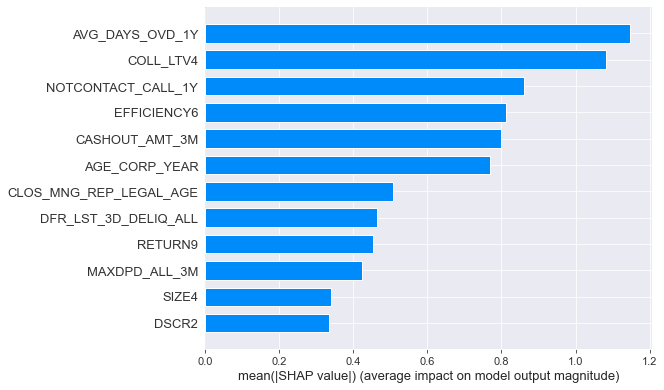

In [35]:
shap.summary_plot(shap_values[1], data_shap, plot_type="bar", max_display=24)

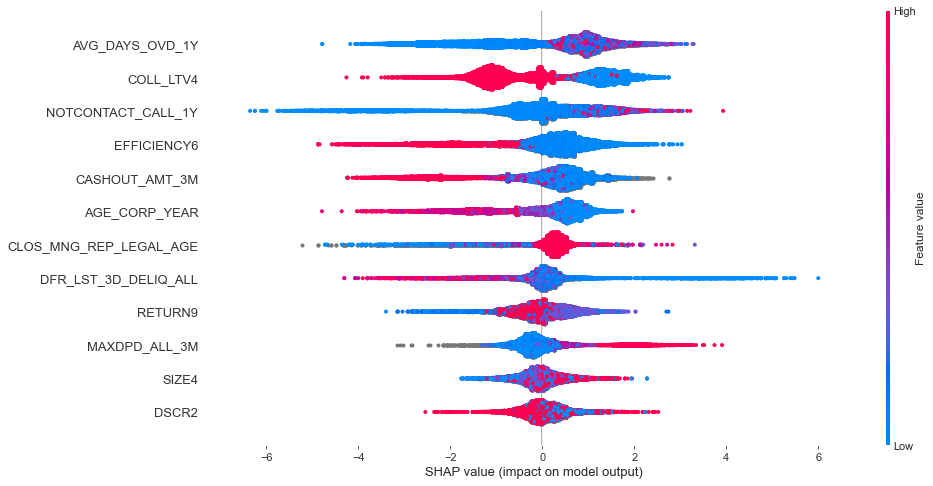

In [36]:
fig, axs = plt.subplots(figsize=(4.5, 3))
axs.set_facecolor('white')
axs.set_ylabel('', fontsize=10)

shap.summary_plot(shap_values[1],data_shap, feature_names = data_shap.columns, plot_size=[14,8])

fig.savefig('Plot/summary_plot_ntb_app_rej.png', bbox_inches="tight")

In [39]:
def shap_plot(var, xmax=False):
    fig, axs = plt.subplots(figsize=(4.5, 3))
    axs.set_facecolor('white')
    axs.set_ylabel(var, fontsize=11)

    shap.summary_plot(shap_values[1][:,data_shap.columns.get_loc(var)].reshape(data_shap.shape[0],1),
                      data_shap[[var]], feature_names = var, max_display=1, plot_size=[5,2], class_inds='')
    fig.savefig('Plot/'+var+'_summary_plot.png', bbox_inches="tight")

    fig, axs = plt.subplots(figsize=(4.5,3.2))
    axs.set_facecolor('white')
    if xmax==False:
        shap.dependence_plot(var, shap_values[1], data_shap, interaction_index=None, ax=axs)
    else:
        shap.dependence_plot(var, shap_values[1], data_shap, interaction_index=None, ax=axs, 
                             xmax=np.percentile(train[var].dropna(),99))
    fig.savefig('Plot/'+var+'_dependence_plot.png', bbox_inches="tight")

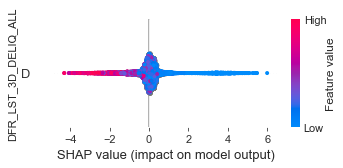

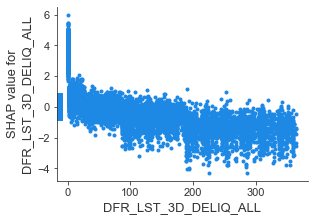

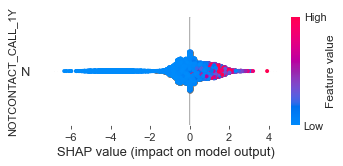

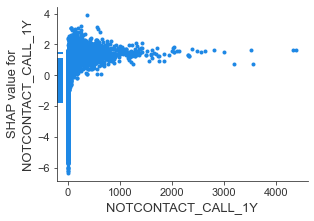

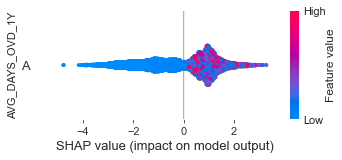

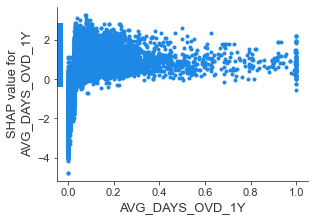

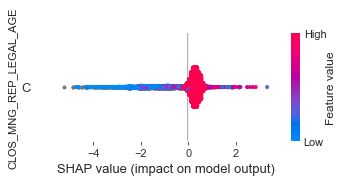

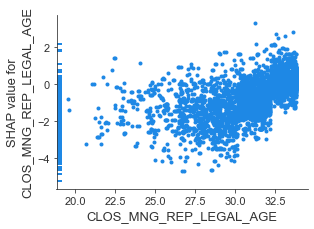

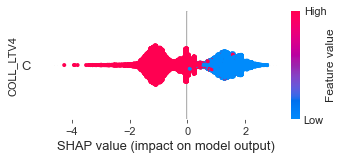

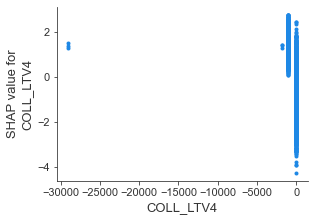

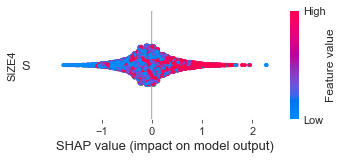

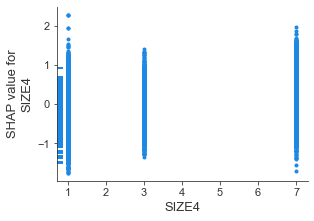

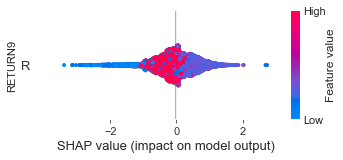

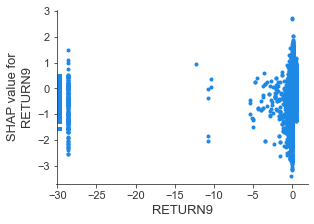

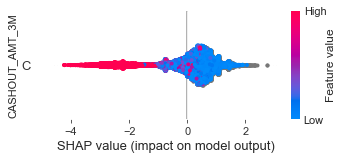

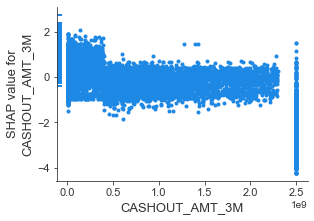

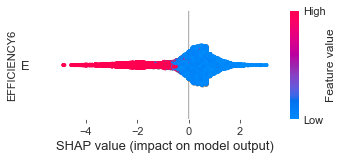

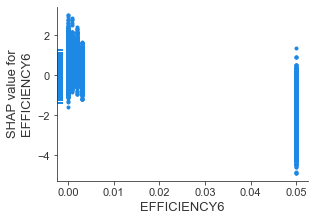

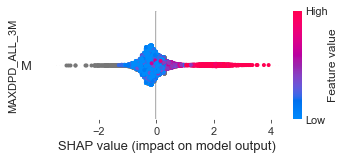

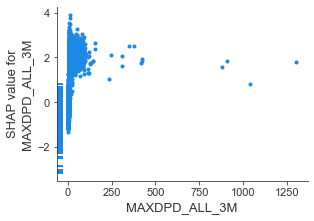

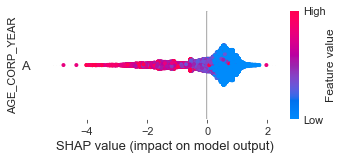

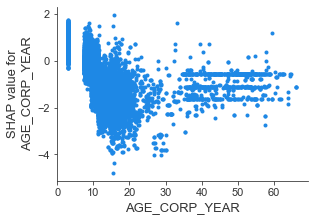

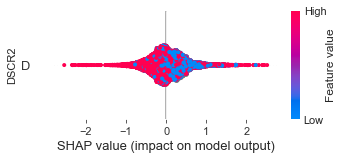

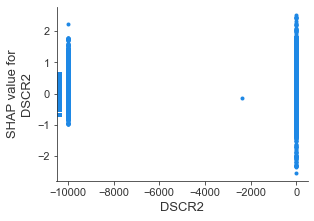

In [40]:
for x in feature_final:
    shap_plot(x, xmax=False)